<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Yelp" data-toc-modified-id="Yelp-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Yelp</a></span></li><li><span><a href="#Testing-the-classifier-on-Amazon-data" data-toc-modified-id="Testing-the-classifier-on-Amazon-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing the classifier on Amazon data</a></span></li><li><span><a href="#Testing-the-classifier-on-IMDb-data" data-toc-modified-id="Testing-the-classifier-on-IMDb-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing the classifier on IMDb data</a></span></li></ul></div>

# Challenge

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.


# Dataset

Dataset of sentiment labelled sentences from the UCI Machine Learning database, including reviews from Yelp, Amason and IMDb.
 

# Yelp

I picked yelp first, and use a bunch of keywords to identify the sentiment of the reviews. From inspection, I think negative reviews have more unique keywords that are less easily confused with positive reviews. So I picked the keywords for negative reviews.

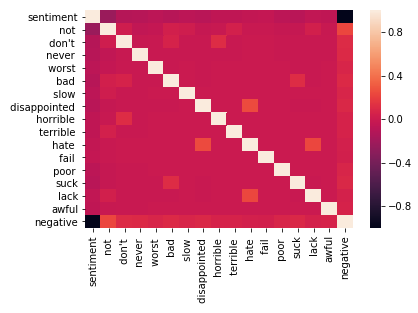

Number of mislabeled points out of a total 1000 points: 352


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

#Load data from yelp
data_yelp = pd.read_table('sentiment\yelp_labelled.txt',header=None)
data_yelp.columns = ['message', 'sentiment']

#Pick key words
keywords = [' not ', " don't ", ' never ', ' worst ', ' bad ', ' slow ',
            ' disappointed ', ' horrible ', ' terrible ', ' hate ',
            ' fail ', ' poor ', 'suck', 'lack', 'awful']

#Constructing features based on keywords
for key in keywords:
    data_yelp[str(key)] = data_yelp.message.str.contains(str(key), case=False)

#Make the outcome ready for modeling
data_yelp['negative'] = (data_yelp['sentiment'] == 0)

#Check the dependency between featurs
sns.heatmap(data_yelp.corr())
plt.show()

#Preparing to model
data = data_yelp[keywords]
target = data_yelp['negative']

#Modeling using Bernoulli Naive Bayes classifier.
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print('Number of mislabeled points out of a total {} points: {}'.format(
        data.shape[0], (target != y_pred).sum()))

# Testing the classifier on Amazon data

Testing the same features and the same classifier on the amazon data.

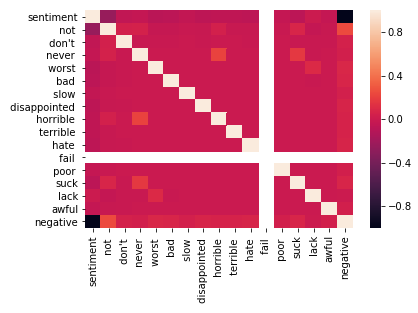

Number of mislabeled points out of a total 1000 points: 392


In [2]:
data_amazon = pd.read_table('sentiment\\amazon_cells_labelled.txt',header=None)
data_amazon.columns = ['message', 'sentiment']

keywords = [' not ', " don't ", ' never ', ' worst ', ' bad ', ' slow ',
            ' disappointed ', ' horrible ', ' terrible ', ' hate ',
            ' fail ', ' poor ', 'suck', 'lack', 'awful']

for key in keywords:
    data_amazon[str(key)] = data_amazon.message.str.contains(str(key), case=False)

data_amazon['negative'] = (data_amazon['sentiment'] == 0)

sns.heatmap(data_amazon.corr())
plt.show()

data = data_amazon[keywords]
target = data_amazon['negative']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print('Number of mislabeled points out of a total {} points: {}'.format(
        data.shape[0], (target != y_pred).sum()))

# Testing the classifier on IMDb data

Testing the same features and the same classifier on the IMDb data.

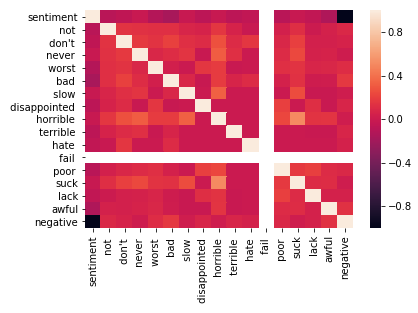

Number of mislabeled points out of a total 748 points: 285


In [3]:
data_imdb = pd.read_table('sentiment\imdb_labelled.txt',header=None)
data_imdb.columns = ['message', 'sentiment']

keywords = [' not ', " don't ", ' never ', ' worst ', ' bad ', ' slow ',
            ' disappointed ', ' horrible ', ' terrible ', ' hate ',
            ' fail ', ' poor ', 'suck', 'lack', 'awful']

for key in keywords:
    data_imdb[str(key)] = data_imdb.message.str.contains(str(key), case=False)

data_imdb['negative'] = (data_imdb['sentiment'] == 0)

sns.heatmap(data_imdb.corr())
plt.show()

data = data_imdb[keywords]
target = data_imdb['negative']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print('Number of mislabeled points out of a total {} points: {}'.format(
        data.shape[0], (target != y_pred).sum()))